In [1]:
## import libraries
import tensorflow as tf
import tensorflow.keras as keras

In [2]:
## import data

fashion_mnist = tf.keras.datasets.fashion_mnist


In [3]:
## load data and splitting dataset into training, testing sets
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
print(f'Length of train images: {len(train_images)}')
print(f'Length of test images: {len(test_images)}')

Length of train images: 60000
Length of test images: 10000


In [5]:
# normalize the pixel values of the train and test images
train_images = train_images / 255.0
test_images = test_images / 255.0

In [12]:
# model using CNN

model = tf.keras.models.Sequential([
    # First Convolution and pooling
    # Here we're asking keras to generate 64 filters for us, these filters are 3 by 3.
    # Their activation is relu, which means the negative values will be thrown way, and finally the input shape is as before, the 28 by 28. 
    # That extra 1 just means color depth. As we saw before our image is our gray scale, so we just use one byte.
    keras.layers.Conv2D(64, (3,3), activation ="relu", input_shape=(28, 28, 1)), 
    # We're saying it's a two-by-two pool, so for every four pixels, the biggest one will survive as shown earlier
    keras.layers.MaxPooling2D(2,2),
    
    # Second Convolution and pooling
    keras.layers.Conv2D(64, (3,3), activation ="relu"),
    keras.layers.MaxPooling2D(2,2),
    
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation= tf.nn.relu),
    keras.layers.Dense(10,activation= tf.nn.softmax)
])

In [14]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dense_4 (Dense)             (None, 128)              

In [13]:
model.compile(optimizer= 'adam',
              loss= 'sparse_categorical_crossentropy',
              metrics= ['accuracy'])

model.fit(train_images, train_labels, epochs=5)

Epoch 1/5


1875/1875 [==============================] - 52s 26ms/step - loss: 0.4455 - accuracy: 0.8391
Epoch 2/5
1875/1875 [==============================] - 49s 26ms/step - loss: 0.2947 - accuracy: 0.8917
Epoch 3/5
1875/1875 [==============================] - 48s 25ms/step - loss: 0.2500 - accuracy: 0.9088
Epoch 4/5
1875/1875 [==============================] - 45s 24ms/step - loss: 0.2193 - accuracy: 0.9186
Epoch 5/5
1875/1875 [==============================] - 47s 25ms/step - loss: 0.1911 - accuracy: 0.9295


In [16]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 3s 9ms/step - loss: 0.2737 - accuracy: 0.9025


[0.2737400531768799, 0.9024999737739563]

In [17]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


1/1 [==============================] - 0s 45ms/step


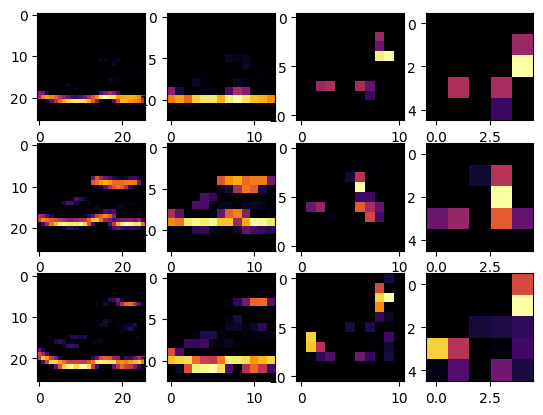

In [18]:
# Visualizing the convolutions and pooling

import matplotlib.pyplot as plt
from tensorflow.keras import models

f, axarr = plt.subplots(3,4)

FIRST_IMAGE = 0
SECOND_IMAGE = 23
THIRD_IMAGE = 28
CONVOLUTION_NUMBER = 1

layers_output = [layer.output for layer in model.layers]
activation_model = models.Model(inputs= model.input, outputs= layers_output)

for x in range(0,4):
    f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[0,x].imshow(f1[0, :, :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[0,x].grid(False)

    f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[1,x].imshow(f2[0, :, :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[1,x].grid(False)

    f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[2,x].imshow(f3[0, :, :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[2,x].grid(False)
